# DTFF_project

## 1. Data Importation and Cleaning

In [2]:
# Import useful modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Load the product annoucement dates from Excel sheet -> don't forget to check current directory
df = pd.read_excel('announcements.xlsx')
df.head()

Company      Date                            Announcement 
0    APPL 2014-09-09                                Iphone 6
1    APPL 2015-03-09          Apple Watch, MacBook (12-inch)
2    APPL 2015-09-09     iPhone 6s, iPhone 6s Plus, iPad Pro
3    APPL 2016-03-21            iPhone SE, 9.7-inch iPad Pro
4    APPL 2016-06-13  iOS 10, macOS Sierra, watchOS 3 (WWDC)

In [327]:
print(df.shape)
print(df.dtypes)
print(df.columns) 

(184, 3)
Company                  object
Date             datetime64[ns]
Announcement             object
dtype: object
Index(['Company', 'Date ', 'Announcement '], dtype='object')


In [329]:
# Change all column names because there seems to be unexpected spaces in the columnn names
df.columns = ['Name', 'Date', 'Announcement']

In [331]:
# Load the stock prices 
df_1 = pd.read_excel('Stock_Prices.xlsx')
df_1.head()

Name  2013-12-31 00:00:00  2014-01-01 00:00:00  2014-01-02 00:00:00  \
0  APPL             17691.13             17691.13             17442.33   
1  NVDA              1004.27              1004.27               994.24   
2  MSFT             52155.35             52155.35             51806.81   
3  AMZN             20363.73             20363.73             20321.87   
4  GOOG              1116.97              1116.97              1109.40   

   2014-01-03 00:00:00  2014-01-06 00:00:00  2014-01-07 00:00:00  \
0             17059.20             17152.22             17029.47   
1               982.33               995.49              1011.79   
2             51458.27             50370.83             50761.19   
3             20243.74             20100.25             20324.92   
4              1101.31              1113.59              1135.05   

   2014-01-08 00:00:00  2014-01-09 00:00:00  2014-01-10 00:00:00  ...  \
0             17137.40             16918.52             16805.66  ...   
1              1025.58               987.34               986.09  ...   
2             49855.00             49534.35             50245.36  ...   
3             20523.57             20477.09             20306.04  ...   
4              1137.42              1126.47              1126.41  ...   

   2023-12-18 00:00:00  2023-12-19 00:00:00  2023-12-20 00:00:00  \
0            197291.60            198349.10            196224.10   
1            133078.10            131821.10            127853.50   
2            616923.50            617933.60            613563.20   
3            157348.10            157062.10            155356.60   
4              5408.61              5442.47              5509.78   

   2023-12-21 00:00:00  2023-12-22 00:00:00  2023-12-25 00:00:00  \
0            196073.00            194985.30            194985.30   
1            130189.30            129764.20            129764.20   
2            618397.10            620118.90            620118.90   
3            157113.20            156684.30            156684.30   
4              5592.62              5635.23              5635.23   

   2023-12-26 00:00:00  2023-12-27 00:00:00  2023-12-28 00:00:00  \
0            194431.30            194532.00            194965.10   
1            130957.40            131324.10            131603.10   
2            620251.10            619274.60            621277.70   
3            156674.00            156602.50            156643.40   
4              5636.43              5590.63              5585.05   

   2023-12-29 00:00:00  
0            193907.60  
1            131603.10  
2            622535.90  
3            155172.80  
4              5563.55  

[5 rows x 2610 columns]

In [333]:
# Reshaping the daily stock prices DataFrame --> here, 'Date' and 'StockPrice' are new variables
df_1 = df_1.melt(id_vars=['Name'], 
                    var_name='Date', 
                    value_name='StockPrice')
df_1.head()

Name                 Date  StockPrice
0  APPL  2013-12-31 00:00:00    17691.13
1  NVDA  2013-12-31 00:00:00     1004.27
2  MSFT  2013-12-31 00:00:00    52155.35
3  AMZN  2013-12-31 00:00:00    20363.73
4  GOOG  2013-12-31 00:00:00     1116.97

In [335]:
print(df_1.shape)
print(df_1.dtypes)
print(df_1.columns) 

(26090, 3)
Name           object
Date           object
StockPrice    float64
dtype: object
Index(['Name', 'Date', 'StockPrice'], dtype='object')


In [337]:
# Make sure 'Date' columns for both dataframes are datetime type
df['Date'] = pd.to_datetime(df['Date'])
df_1['Date'] = pd.to_datetime(df_1['Date'])

In [339]:
# Merge both dataframes on 'Name' and 'Date'
# /!\ Keep in mind that we will lose the 2024 announcement dates during the merging because the stock prices ends in 2023
df = pd.merge(df, df_1, on=['Name', 'Date'], how='right')

# Here we just want to sort by company names and dates in order to facilitate the later computations, we also reset the index
df = df.sort_values(by=['Name', 'Date']).reset_index(drop=True)

df.head()

Name       Date Announcement  StockPrice
0  AMZN 2013-12-31          NaN    20363.73
1  AMZN 2014-01-01          NaN    20363.73
2  AMZN 2014-01-02          NaN    20321.87
3  AMZN 2014-01-03          NaN    20243.74
4  AMZN 2014-01-06          NaN    20100.25

In [341]:
print(df.shape)
print(df.dtypes)
print(df.columns) 

(26090, 4)
Name                    object
Date            datetime64[ns]
Announcement            object
StockPrice             float64
dtype: object
Index(['Name', 'Date', 'Announcement', 'StockPrice'], dtype='object')


In [343]:
# Here is to make sure that the merging did its work and there is not only nans in the 'Announcement' column
non_nan_announcement = df[df['Announcement'].notna()]
len(non_nan_announcement)

155

In [345]:
# Count missing values for each column
missing_values = df.isna().sum()

# Identify potential rows where the 'StockPrice' has a value of zero --> would be inconsistent
zero_values = df[df['StockPrice'] == 0.0]

# Identify potential rows where the 'StockPrice' has a negative value
negative_values = df[df['StockPrice'] < 0]

print(missing_values)
print(zero_values)
print(negative_values)

Name                0
Date                0
Announcement    25935
StockPrice          0
dtype: int64
Empty DataFrame
Columns: [Name, Date, Announcement, StockPrice]
Index: []
Empty DataFrame
Columns: [Name, Date, Announcement, StockPrice]
Index: []


## 2. Compute Daily Returns and Volatilities

In [348]:
# Calculate daily returns and rolling annualized volatility for each firm independently

# to annualize, just multiply by sqrt(252)
df['Daily_Return'] = df.groupby('Name')['StockPrice'].pct_change()
df['Rolling_Volatility'] = df.groupby('Name')['Daily_Return'].rolling(window=10).std().reset_index(0, drop=True)

df.head()

Name       Date Announcement  StockPrice  Daily_Return  Rolling_Volatility
0  AMZN 2013-12-31          NaN    20363.73           NaN                 NaN
1  AMZN 2014-01-01          NaN    20363.73      0.000000                 NaN
2  AMZN 2014-01-02          NaN    20321.87     -0.002056                 NaN
3  AMZN 2014-01-03          NaN    20243.74     -0.003845                 NaN
4  AMZN 2014-01-06          NaN    20100.25     -0.007088                 NaN

In [350]:
# Count missing values for each column
missing_values = df.isna().sum()

# we get 10 nan values for the returns because there is 10 companies so the first return is always nan
# we get 200 = 20*10 for the rolling volatility because it must contain 20 elements before computing the first volatility
print(missing_values)

Name                      0
Date                      0
Announcement          25935
StockPrice                0
Daily_Return             10
Rolling_Volatility      100
dtype: int64


In [352]:
# Drop rows where 'Daily_Return' or 'Rolling_Volatility' is NaN
# /!\ Keep in mind that we will lose all the first 20 observations for each firms so 200 rows in total
df = df.dropna(subset=['Daily_Return', 'Rolling_Volatility'])

# Display the first few rows
df.head()

Name       Date Announcement  StockPrice  Daily_Return  Rolling_Volatility
10  AMZN 2014-01-14          NaN    20299.90      0.016778            0.010152
11  AMZN 2014-01-15          NaN    20214.63     -0.004201            0.010226
12  AMZN 2014-01-16          NaN    20211.05     -0.000177            0.010216
13  AMZN 2014-01-17          NaN    20405.61      0.009626            0.010606
14  AMZN 2014-01-20          NaN    20405.61      0.000000            0.010248

In [354]:
# Count missing values for each column
missing_values = df.isna().sum()

# everything seemed to have worked as expected
print(missing_values)

Name                      0
Date                      0
Announcement          25835
StockPrice                0
Daily_Return              0
Rolling_Volatility        0
dtype: int64


## 3. Descriptive Statistics and Data Visualization

In [357]:
# Group by 'Name' (Firm) and select the relevant columns
descriptive_stats = df.groupby('Name')['Daily_Return'].agg(['mean', 'std'])

# Display the descriptive statistics
descriptive_stats

mean       std
Name                     
AMZN   0.001000  0.020550
APPL   0.001094  0.017577
AVGO   0.001509  0.021560
GOOG   0.000766  0.017270
META   0.000982  0.023149
MSFT   0.001120  0.016750
NVDA   0.002302  0.028720
TECHY  0.000696  0.021893
TSLA   0.001858  0.034473
TSMC   0.000909  0.016173

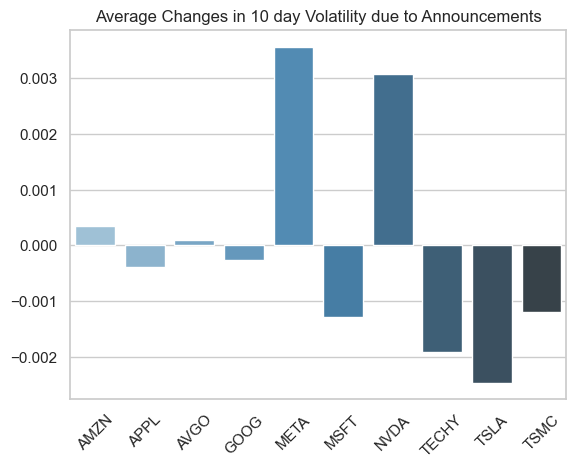

In [359]:
# Create a new DataFrame to store pre- and post-announcement values
results = []

# Iterate through each firm
for firm in df['Name'].unique():
    # Filter the data for the current firm
    firm_data = df[df['Name'] == firm].sort_values(by='Date')
    
    # Filter rows where there's an announcement
    announcements = firm_data[firm_data['Announcement'].notna()]
    
    # Loop through each announcement
    for _, row in announcements.iterrows():
        # Get the index of the current row
        current_index = row.name
        
        # Get pre- and post-announcement data
        vol_pre = firm_data.loc[current_index - 1, 'Rolling_Volatility'] if current_index - 1 in firm_data.index else None
        vol_post = firm_data.loc[current_index + 1, 'Rolling_Volatility'] if current_index + 1 in firm_data.index else None
        vol_change = vol_post - vol_pre
        
        # Append the data to the results list
        results.append({
            'Name': firm,
            'Announcement': row['Announcement'],
            'Date': row['Date'],
            'Volatility_Pre':  vol_pre,
            'Volatility_Post': vol_post,
            'Volatility_Change': vol_change
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Compute averages and changes grouped by firm
summary_df = results_df.groupby('Name').agg(
    Avg_Vol_Pre=('Volatility_Pre', 'mean'),
    Avg_Vol_Post=('Volatility_Post', 'mean'),
    Avg_Vol_Change=('Volatility_Change', 'mean'),
).reset_index()

# Plot average pre- and post-volatility
sns.barplot(x='Name', y='Avg_Vol_Change', data=summary_df, palette='Blues_d')

# Customize the plot
plt.title('Average Changes in 10 day Volatility due to Announcements')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45)

# Show the plot
plt.show()

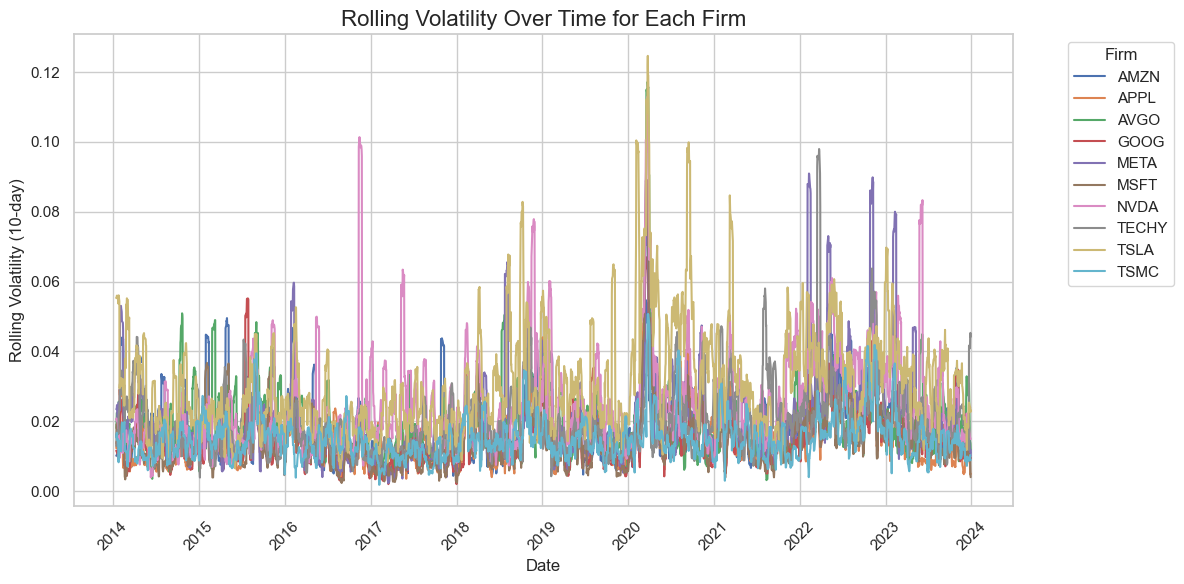

In [361]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Plot the rolling volatility for each firm
plt.figure(figsize=(12, 6))

# Loop through each unique firm and plot the rolling volatility
for firm in df['Name'].unique():
    firm_data = df[df['Name'] == firm]
    plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label=firm)

# Customize the plot
plt.title('Rolling Volatility Over Time for Each Firm', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Volatility (10-day)', fontsize=12)
plt.legend(title='Firm', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

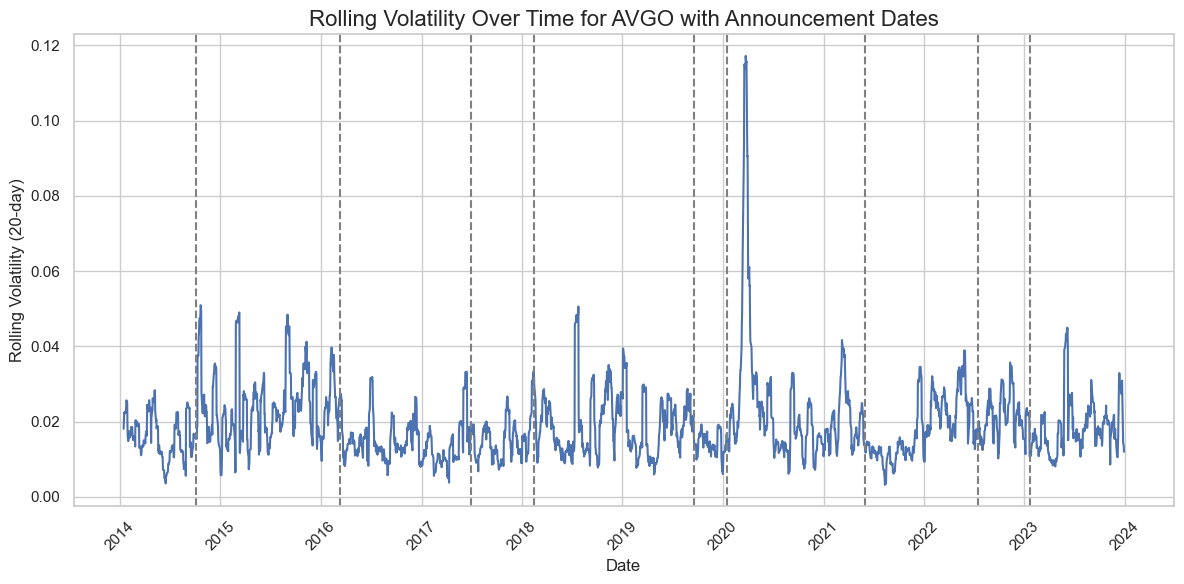

In [363]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Plot the rolling volatility for each firm
plt.figure(figsize=(12, 6))

# Loop through each unique firm and plot the rolling volatility
firm_data = df[df['Name'] == 'AVGO']
plt.plot(firm_data['Date'], firm_data['Rolling_Volatility'], label='AVGO')

# Highlight the announcement dates by adding vertical lines
announcement_data = df[df['Name'] == 'AVGO'].dropna(subset=['Announcement'])
for _, row in announcement_data.iterrows():
    plt.axvline(x=row['Date'], color='grey', linestyle='--')

# Customize the plot
plt.title('Rolling Volatility Over Time for AVGO with Announcement Dates', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Rolling Volatility (20-day)', fontsize=12)
plt.xticks(rotation=45)  # Rotate date labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

## 4. Linear Regression

In [366]:
# Create a binary column for announcements
df['Announcement_Binary'] = df['Announcement'].notna().astype(int)

# Select relevant columns
X = df[['Announcement_Binary']]  # Independent variable
y = df['Rolling_Volatility']     # Dependent variable

In [368]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for Announcement_Binary: {model.coef_[0]}")

# Evaluate the model
y_pred = model.predict(X_test)
print(f"R^2 Score: {model.score(X_test, y_test)}")

Intercept: 0.019317437887891822
Coefficient for Announcement_Binary: 0.0019166839158981386
R^2 Score: -0.0005099587924510818
